<p align='center'>
<img src ="https://d31uz8lwfmyn8g.cloudfront.net/Assets/logo-henry-white-lg.png">
<p>

<h1 align='center'>
 <b>PROYECTO INDIVIDUAL Nº2</b>
 <p>

  <b>Análisis Exploratorio de Datos (EDA)</b>
</h1>


# **Importación de Librerías a utilizar**


In [69]:
#import pandas as pd 
#import numpy as np 
#import seaborn as sns 
#import matplotlib.pyplot as plt 
#import scipy.stats as estadísticas

#import matplotlib.ticker as ticker


# **Cargamos datos, revisamos información general y columnas.**

In [70]:
df1 = pd.read_excel("Dataset/Dataset2/1_Datos_demograficos.xlsx")


In [71]:
df1.head()

Año  Trimestre        Provincia  Total Accesos  Total Población  \
0  2022          3     Buenos Aires        4721668     1.790545e+07   
1  2022          3  Capital Federal        1547679     3.081798e+06   
2  2022          3        Catamarca          70293     4.229422e+05   
3  2022          3            Chaco         144146     1.229915e+06   
4  2022          3           Chubut         165778     6.410596e+05   

   Total Viviendas  
0     6.044896e+06  
1     1.265684e+06  
2     1.075968e+05  
3     3.286503e+05  
4     1.964660e+05

In [72]:
df1.info()
df1.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Año              840 non-null    int64  
 1   Trimestre        840 non-null    int64  
 2   Provincia        840 non-null    object 
 3   Total Accesos    840 non-null    int64  
 4   Total Población  840 non-null    float64
 5   Total Viviendas  840 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 39.5+ KB


Año   Trimestre  Total Accesos  Total Población  \
count   840.000000  840.000000   8.400000e+02     8.400000e+02   
mean   2017.885714    2.457143   3.457417e+05     1.851664e+06   
std       2.528745    1.105009   7.419436e+05     3.336568e+06   
min    2014.000000    1.000000   1.255700e+04     1.467580e+05   
25%    2016.000000    1.000000   5.202975e+04     5.450462e+05   
50%    2018.000000    2.000000   1.034895e+05     8.569595e+05   
75%    2020.000000    3.000000   1.779148e+05     1.487861e+06   
max    2022.000000    4.000000   4.721668e+06     1.790545e+07   

       Total Viviendas  
count     8.400000e+02  
mean      6.283599e+05  
std       1.351034e+06  
min       4.383271e+04  
25%       1.483492e+05  
50%       2.346245e+05  
75%       4.157255e+05  
max       2.302384e+07

In [73]:
df1.columns

Index(['Año', 'Trimestre', 'Provincia', 'Total Accesos', 'Total Población',
       'Total Viviendas'],
      dtype='object')

In [74]:
df1["Provincia"].unique()


array(['Buenos Aires', 'Capital Federal', 'Catamarca', 'Chaco', 'Chubut',
       'Córdoba', 'Corrientes', 'Entre Ríos', 'Formosa', 'Jujuy',
       'La Pampa', 'La Rioja', 'Mendoza', 'Misiones', 'Neuquén',
       'Río Negro', 'Salta', 'San Juan', 'San Luis', 'Santa Cruz',
       'Santa Fe', 'Santiago Del Estero', 'Tierra Del Fuego', 'Tucumán'],
      dtype=object)

# **Agregamos una columna con la fecha que incluye año y trimestre y vamos a graficar la evolución de los accesos totales a lo largo del tiempo.**

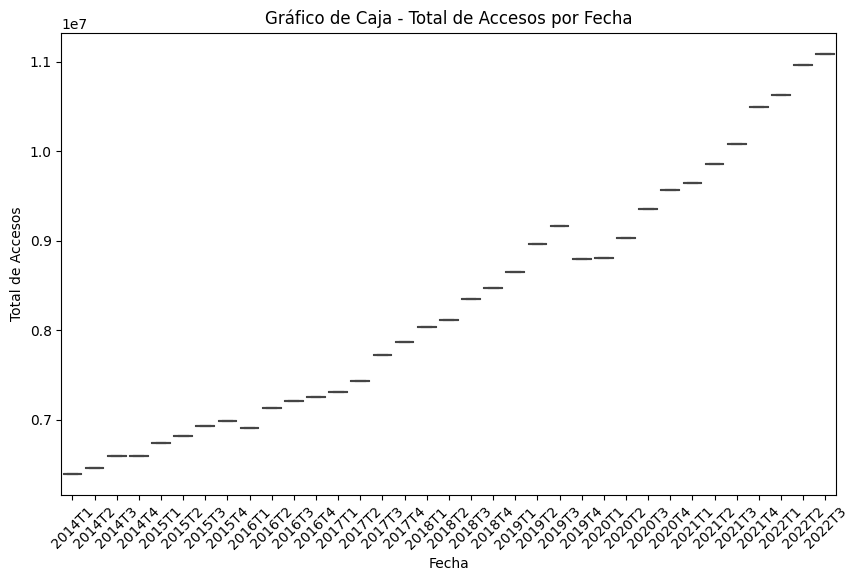

In [75]:

df1['Fecha'] = df1['Año'].astype(str) + 'T' + df1['Trimestre'].astype(str)

df_agrupado = df1.groupby('Fecha')['Total Accesos'].sum().reset_index()

plt.figure(figsize=(10, 6))  # Ajustar el tamaño de la figura si es necesario
sns.boxplot(x='Fecha', y='Total Accesos', data=df_agrupado)
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x si es necesario
plt.xlabel('Fecha')
plt.ylabel('Total de Accesos')
plt.title('Gráfico de Caja - Total de Accesos por Fecha')
plt.show()


# **Con un gráfico de cajas vamos a ver cuales fueron las provincias con mayor incremento relativo de accesos a internet.**

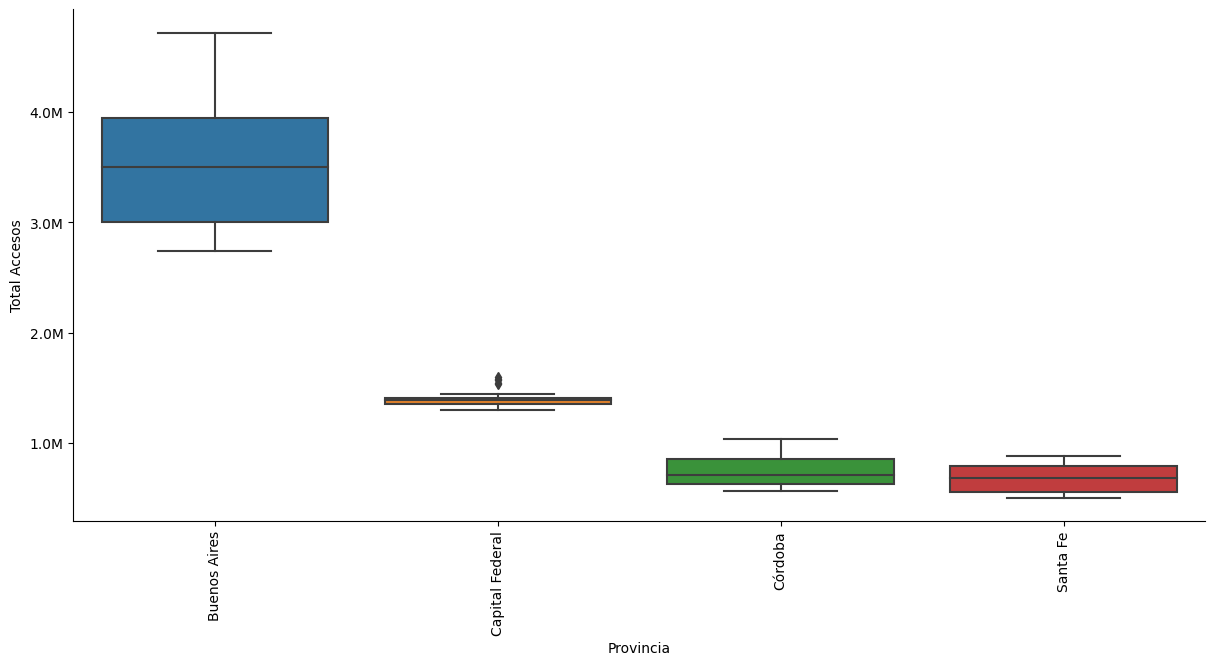

In [76]:
provincias = ["Buenos Aires", "Santa Fe","Córdoba","Capital Federal"]
sns.catplot(x="Provincia", y="Total Accesos", kind='box', data=df1[df1["Provincia"].isin(provincias)], height=6, aspect=2, orient="v")


ax = plt.gca()


ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x/1e6:.1f}M'))


plt.xticks(rotation=90)


plt.show()

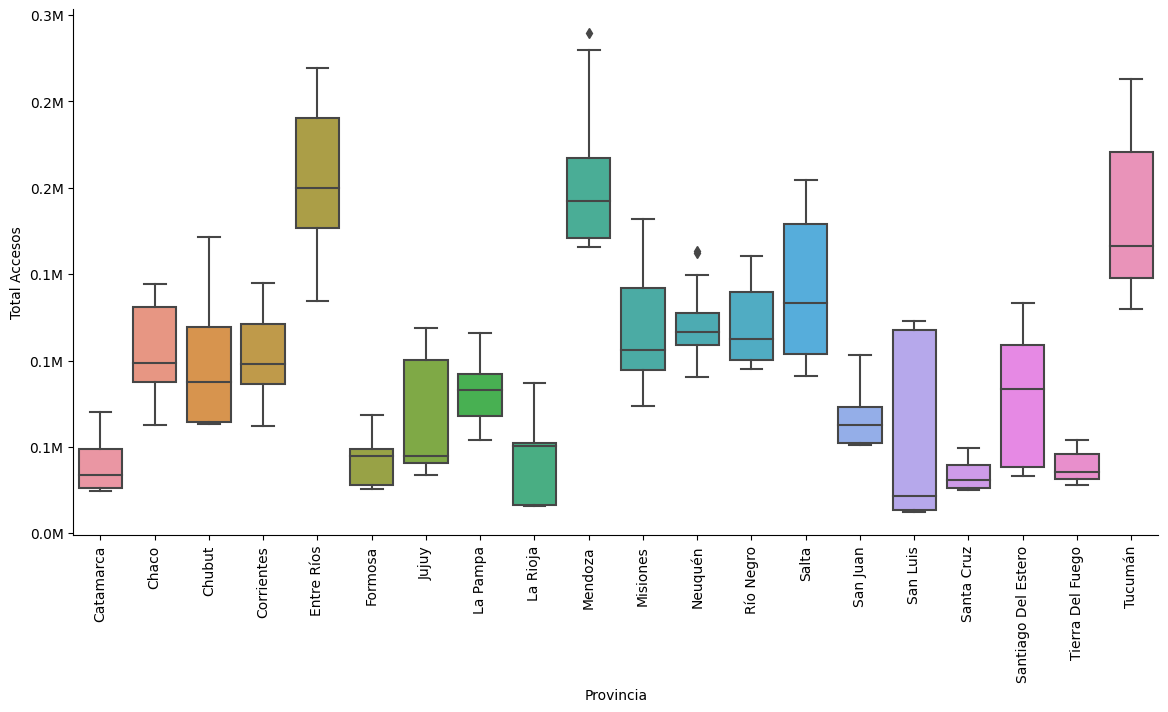

In [77]:

provincias = df1[~df1["Provincia"].isin(["Buenos Aires", "Córdoba","Santa Fe","Capital Federal"])]["Provincia"].unique()
sns.catplot(x="Provincia", y="Total Accesos", kind='box', data=df1[df1["Provincia"].isin(provincias)], height=6, aspect=2, orient="v")


ax = plt.gca()


ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x/1e6:.1f}M'))


plt.xticks(rotation=90)


plt.show()


# **Graficamos la evolución de los Accesos a Internet Fija a lo largo del tiempo por cada provincia y en total.**

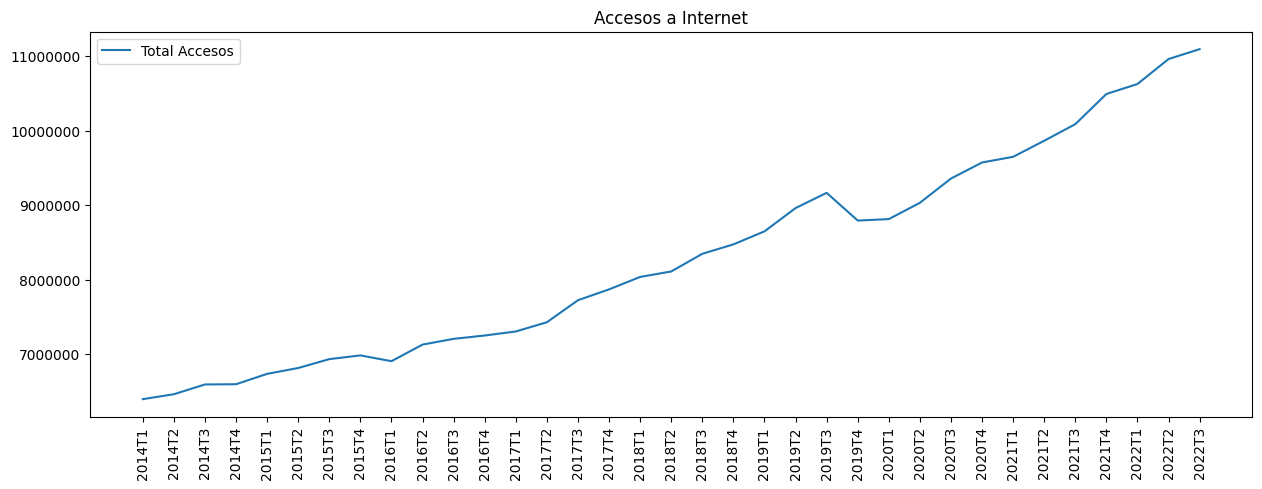

In [78]:

plt.figure(figsize=(15, 5))
plt.title('Accesos a Internet')
plt.plot(df_agrupado['Total Accesos'])
plt.legend(['Total Accesos'])

# Establecer las fechas en el eje x
plt.xticks(range(len(df_agrupado)), df_agrupado['Fecha'], rotation=90)

# Ajustar el formato del eje y
plt.ticklabel_format(style='plain', axis='y')

plt.show()



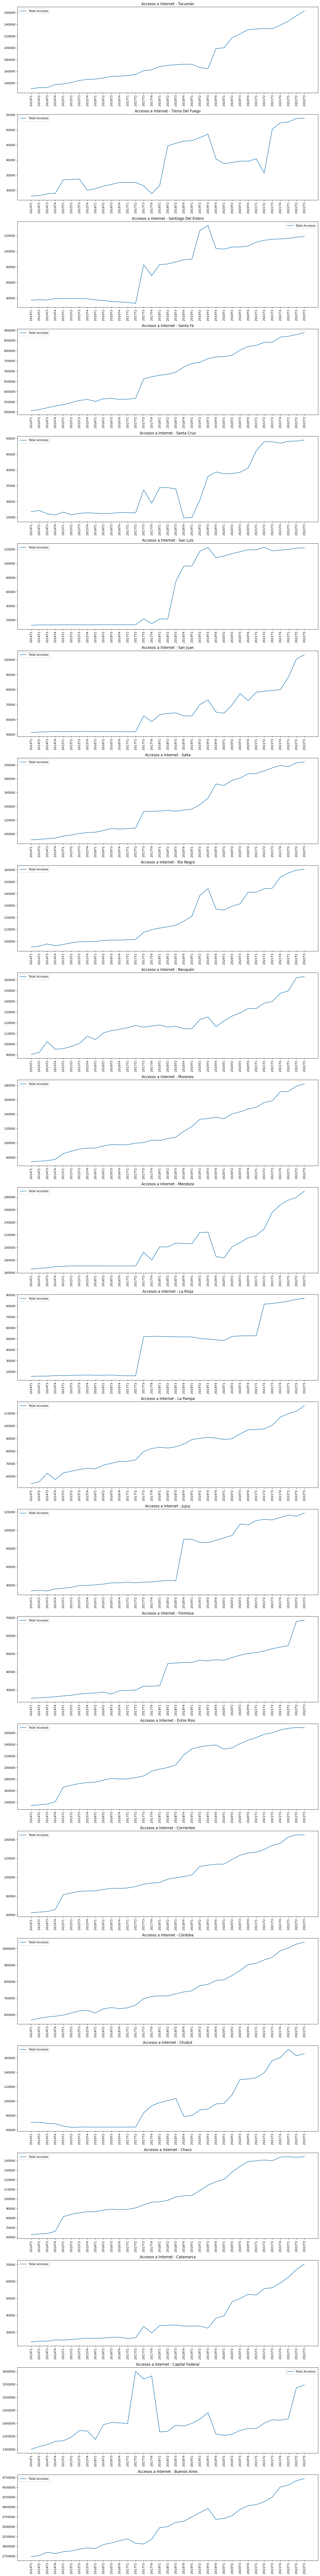

In [79]:

#import matplotlib.pyplot as plt

# Obtener las provincias únicas en orden inverso
provincias = reversed(df1['Provincia'].unique())

# Configurar el tamaño de la figura
plt.figure(figsize=(15, 5 * len(df1['Provincia'].unique())))

# Iterar sobre cada provincia y generar un gráfico individual
for i, provincia in enumerate(provincias):
    plt.subplot(len(df1['Provincia'].unique()), 1, i+1)

    # Filtrar y ordenar los datos por fecha
    data = df1[df1['Provincia'] == provincia]
    data = data.sort_values(by='Fecha')

    plt.plot(data['Fecha'], data['Total Accesos'])
    plt.title(f'Accesos a Internet - {provincia}')
    plt.xticks(rotation=90)
    plt.ticklabel_format(style='plain', axis='y')
    plt.legend(['Total Accesos'])

plt.tight_layout()  # Ajustar el espaciado entre subplots
plt.show()



# **Cargamos el segundo Dataset correspondiente a la evolución de la velocidad.**
**Volvemos a revisar información, columnas y descripción. Luego graficamos como se fue incrementando la misma por provincia y en total**

In [80]:
df3 = pd.read_excel("Dataset/Dataset2/B_historico_velocidad_internet_Total_TRIM.xlsx")

In [81]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Año                     35 non-null     int64  
 1   Trimestre               35 non-null     int64  
 2   Mbps (Media de bajada)  35 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 972.0 bytes


In [82]:
# Convertir la columna 'Fecha' a un formato legible
df3['Fecha'] = df3['Año'].astype(str) + 'T' + df3['Trimestre'].astype(str)

In [83]:
df3 = df3.sort_values('Fecha')



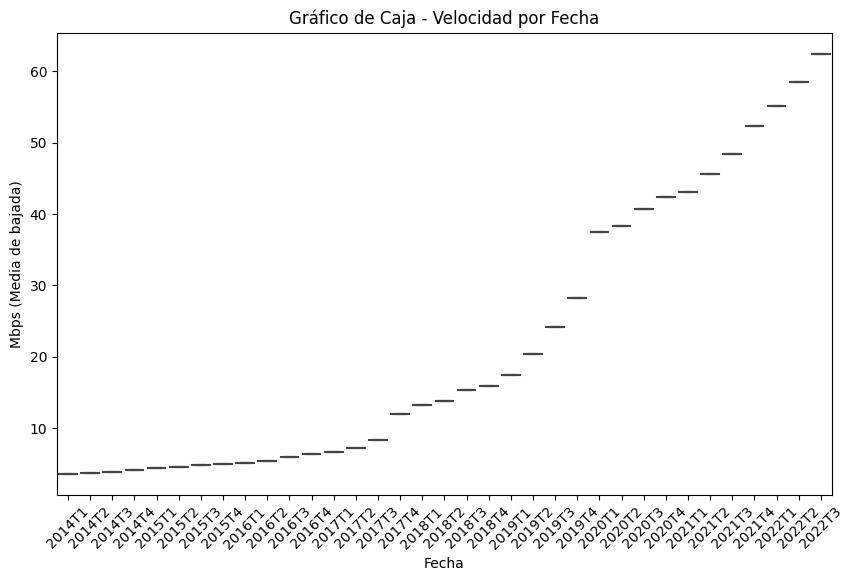

In [84]:




plt.figure(figsize=(10, 6))
sns.boxplot(x='Fecha', y='Mbps (Media de bajada)', data=df3)
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x si es necesario
plt.xlabel('Fecha')
plt.ylabel('Mbps (Media de bajada)')
plt.title('Gráfico de Caja - Velocidad por Fecha')
plt.show()


In [85]:
df2 = pd.read_excel("Dataset/Dataset2/A_historico_velocidad_internet_prov_TRIM.xlsx")

In [86]:
df2.head()

Año  Trimestre        Provincia  Mbps (Media de bajada)
0  2022          3     Buenos Aires                   70.19
1  2022          3  Capital Federal                  101.05
2  2022          3        Catamarca                   60.99
3  2022          3            Chaco                   53.21
4  2022          3           Chubut                   15.57

In [87]:
df2.info()
df2.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Año                     840 non-null    int64  
 1   Trimestre               840 non-null    int64  
 2   Provincia               840 non-null    object 
 3   Mbps (Media de bajada)  840 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 26.4+ KB


Año   Trimestre  Mbps (Media de bajada)
count   840.000000  840.000000              840.000000
mean   2017.885714    2.457143               13.857271
std       2.528745    1.105009               14.666449
min    2014.000000    1.000000                2.573729
25%    2016.000000    1.000000                4.248956
50%    2018.000000    2.000000                7.098248
75%    2020.000000    3.000000               18.320004
max    2022.000000    4.000000              101.050000

In [88]:
df2['Fecha'] = df2['Año'].astype(str) + 'T' + df2['Trimestre'].astype(str)

In [89]:
df2.columns

Index(['Año', 'Trimestre', 'Provincia', 'Mbps (Media de bajada)', 'Fecha'], dtype='object')

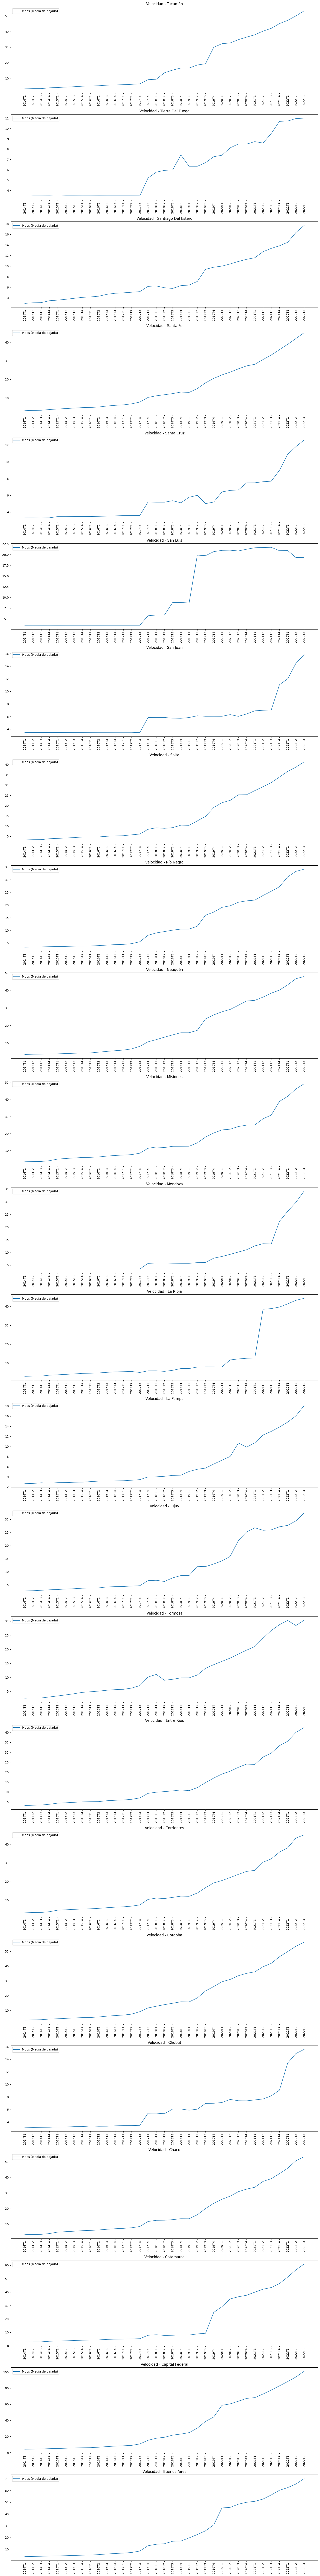

In [90]:


# Obtener las provincias únicas en orden inverso
provincias = reversed(df2['Provincia'].unique())

# Configurar el tamaño de la figura
plt.figure(figsize=(15, 5 * len(df2['Provincia'].unique())))

# Iterar sobre cada provincia y generar un gráfico individual
for i, provincia in enumerate(provincias):
    plt.subplot(len(df2['Provincia'].unique()), 1, i+1)

    # Filtrar y ordenar los datos por fecha
    data = df2[df2['Provincia'] == provincia]
    data = data.sort_values(by='Fecha')

    plt.plot(data['Fecha'], data['Mbps (Media de bajada)'])
    plt.title(f'Velocidad - {provincia}')
    plt.xticks(rotation=90)
    plt.ticklabel_format(style='plain', axis='y')
    plt.legend(['Mbps (Media de bajada)'])

plt.tight_layout()  # Ajustar el espaciado entre subplots
plt.show()


# **Cargamos el último Dataset**
**Este correspondiente a la distribución de los accesos por provincia en relación al tipo de tecnología utilizado haciendo los mismos analisis que en los datos anteriores.**

In [91]:
df4 = pd.read_excel("Dataset/Dataset2/3_Penetracion_tecno.xlsx")

In [92]:
df4['Fecha'] = df4['Año'].astype(str) + 'T' + df4['Trimestre'].astype(str)

In [93]:
df4.info()
df4.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Año           840 non-null    int64 
 1   Trimestre     840 non-null    int64 
 2   Provincia     840 non-null    object
 3   ADSL          840 non-null    int64 
 4   Cablemodem    840 non-null    int64 
 5   Fibra óptica  840 non-null    int64 
 6   Wireless      840 non-null    int64 
 7   Otros         840 non-null    int64 
 8   Total         840 non-null    int64 
 9   Fecha         840 non-null    object
dtypes: int64(8), object(2)
memory usage: 65.8+ KB


Año   Trimestre          ADSL    Cablemodem  Fibra óptica  \
count   840.000000  840.000000  8.400000e+02  8.400000e+02  8.400000e+02   
mean   2017.885714    2.457143  1.275668e+05  1.717750e+05  2.991186e+04   
std       2.528745    1.105009  2.550543e+05  4.221661e+05  1.235013e+05   
min    2014.000000    1.000000  6.842000e+03  0.000000e+00  0.000000e+00   
25%    2016.000000    1.000000  2.247925e+04  8.599750e+03  1.860000e+02   
50%    2018.000000    2.000000  4.859600e+04  3.498400e+04  1.093000e+03   
75%    2020.000000    3.000000  1.045695e+05  7.074850e+04  1.386250e+04   
max    2022.000000    4.000000  1.586343e+06  2.748325e+06  1.436433e+06   

            Wireless         Otros         Total  
count     840.000000    840.000000  8.400000e+02  
mean    10345.001190   6142.961905  3.457417e+05  
std     18192.024086  10572.152928  7.419436e+05  
min         0.000000      2.000000  1.255700e+04  
25%       253.000000    307.250000  5.202975e+04  
50%      4261.500000   1852.000000  1.034895e+05  
75%     12435.000000   6915.500000  1.779148e+05  
max    126887.000000  73415.000000  4.721668e+06

In [94]:
df4.head(3)

Año  Trimestre        Provincia    ADSL  Cablemodem  Fibra óptica  \
0  2022          3     Buenos Aires  339648     2748325       1436433   
1  2022          3  Capital Federal  140791     1240125        129218   
2  2022          3        Catamarca   10010       10495         46224   

   Wireless  Otros    Total   Fecha  
0    126846  70416  4721668  2022T3  
1      5758  31787  1547679  2022T3  
2      1329   2235    70293  2022T3

In [95]:
df4.columns

Index(['Año', 'Trimestre', 'Provincia', 'ADSL', 'Cablemodem', 'Fibra óptica',
       'Wireless', 'Otros', 'Total', 'Fecha'],
      dtype='object')

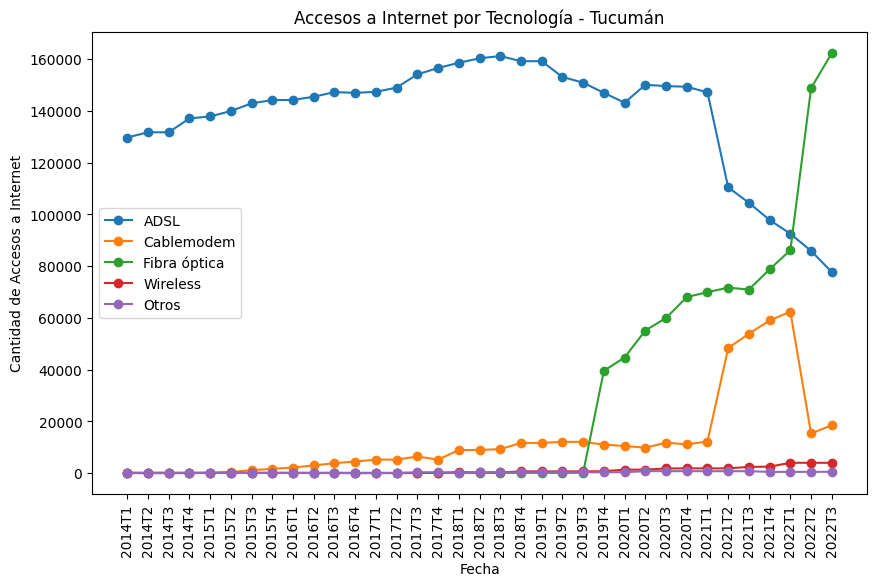

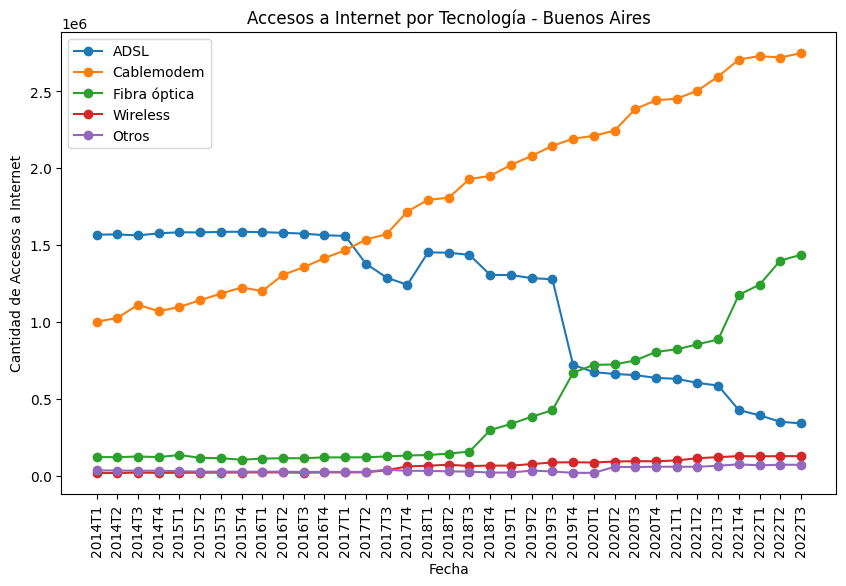

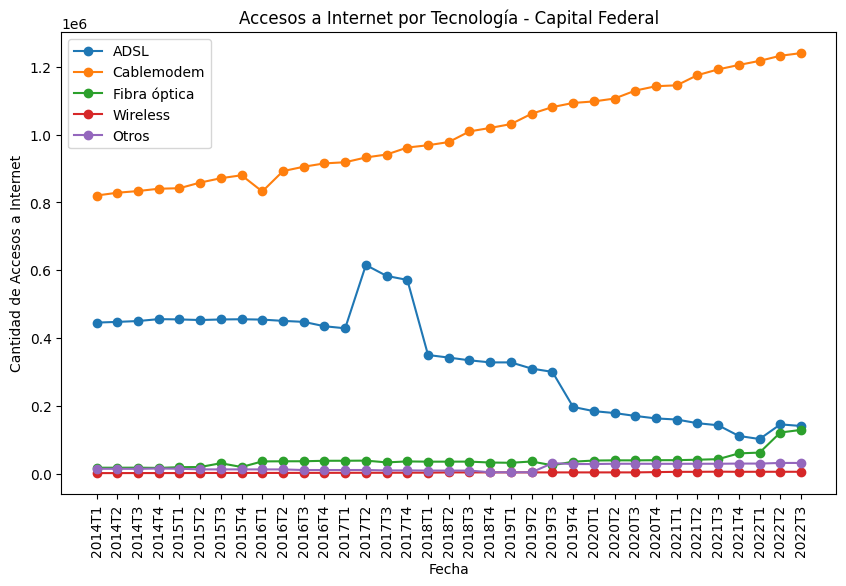

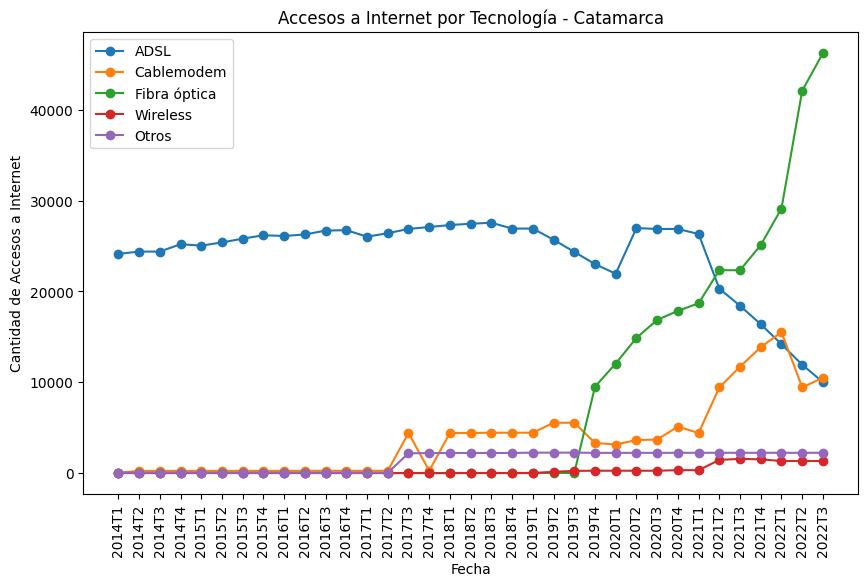

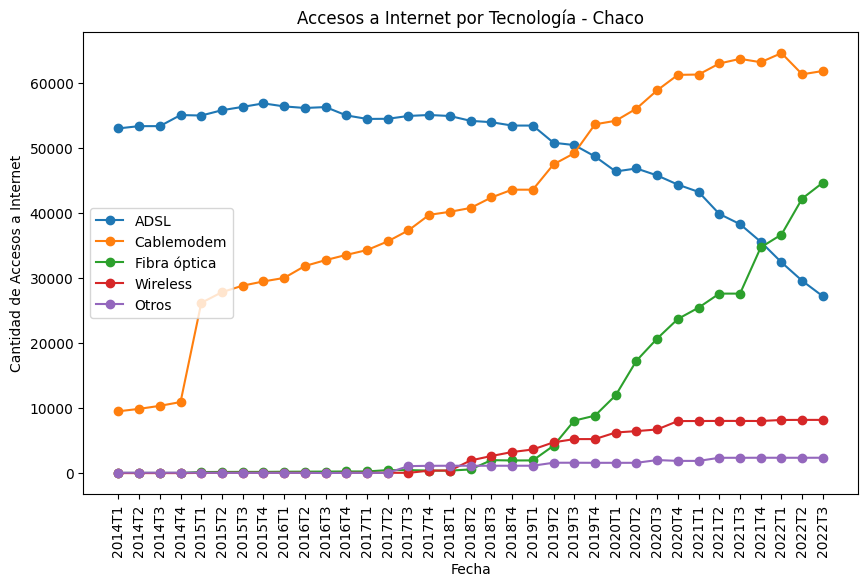

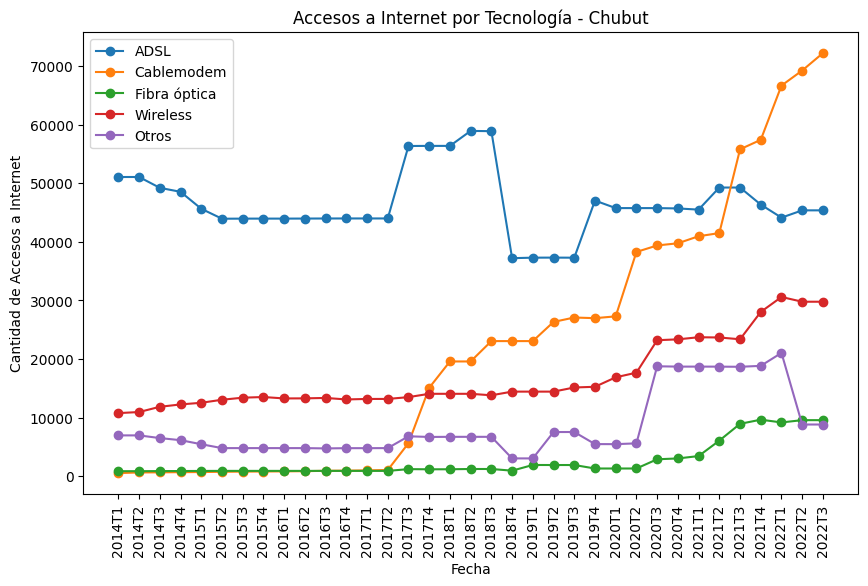

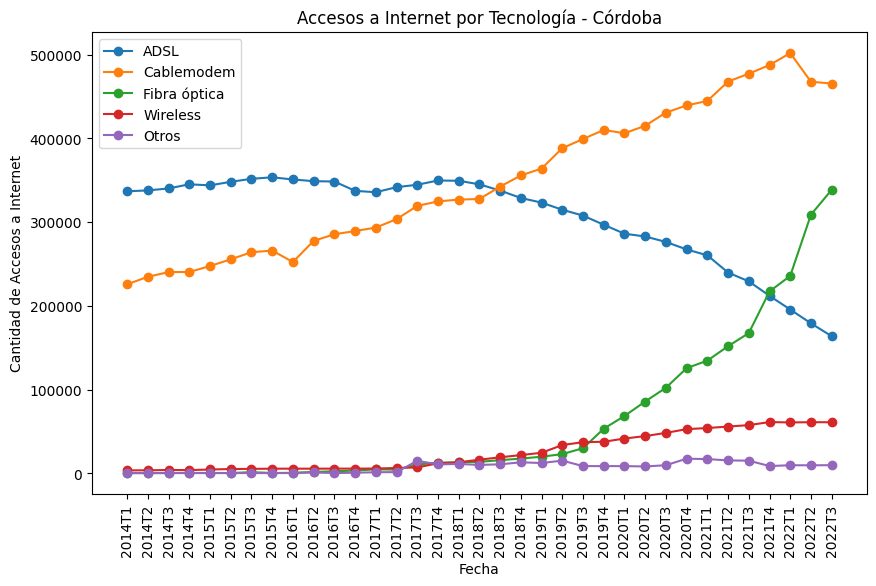

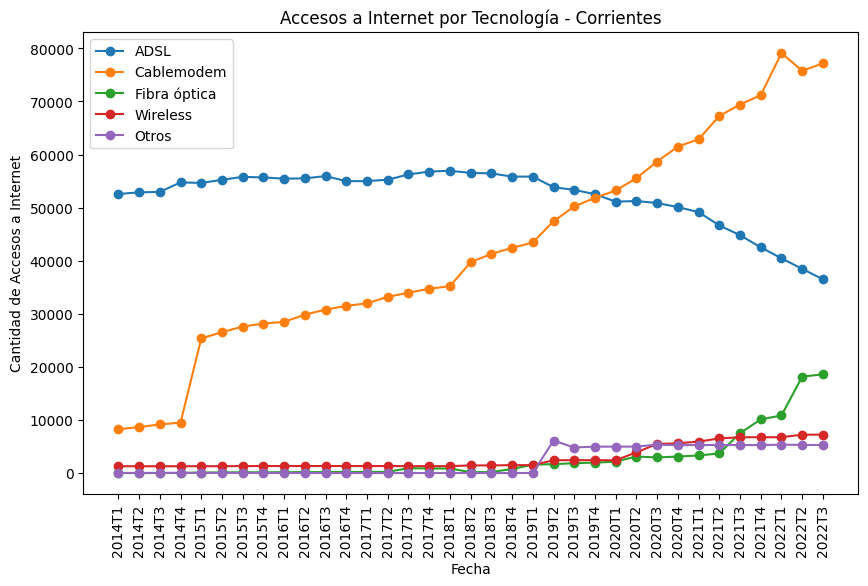

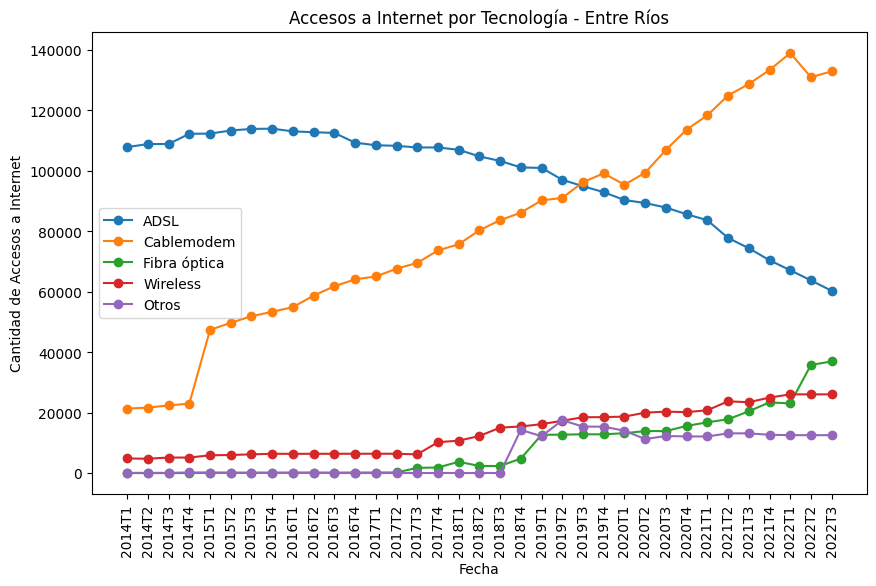

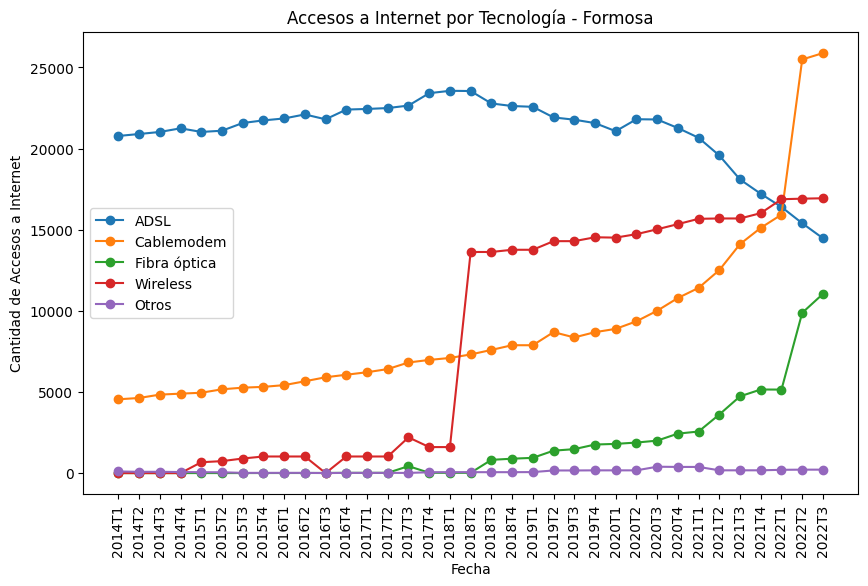

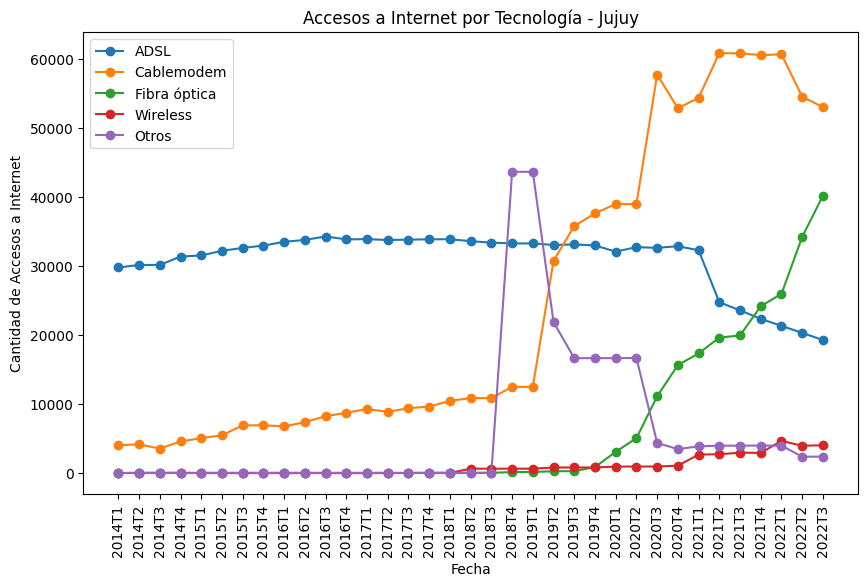

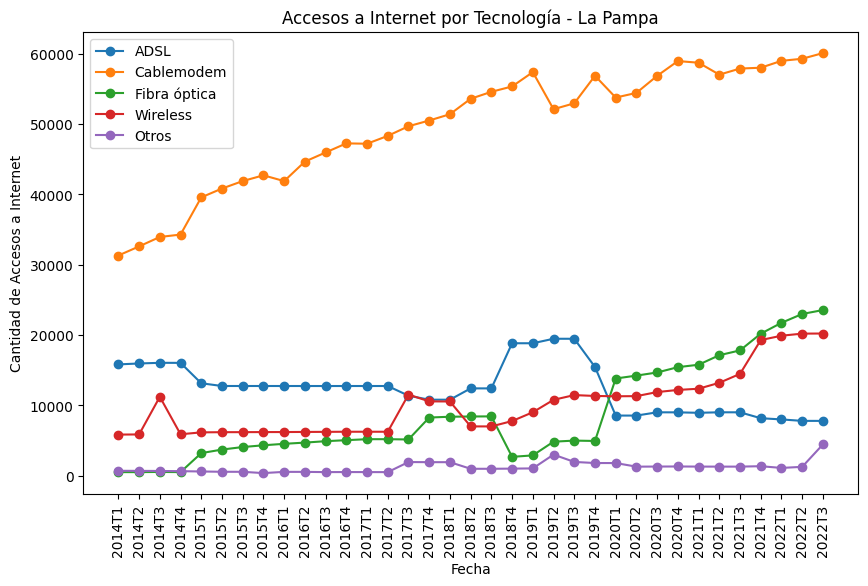

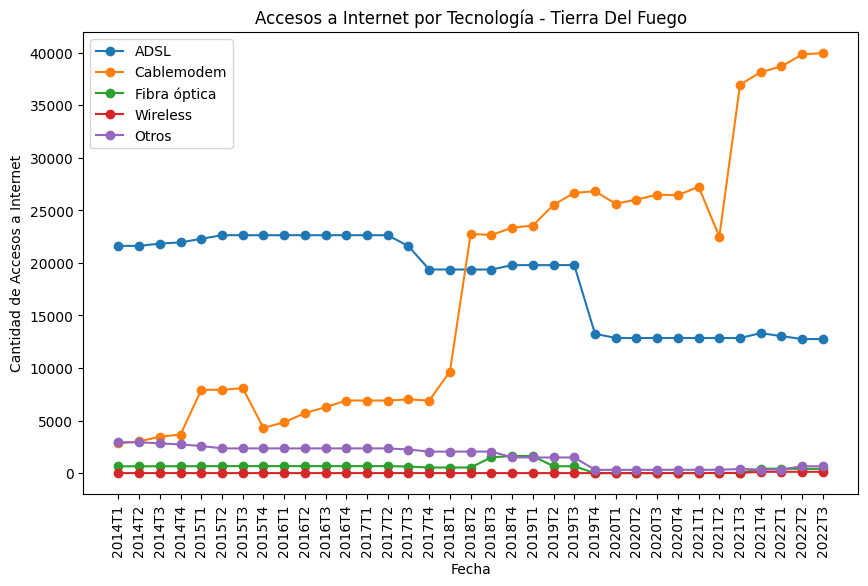

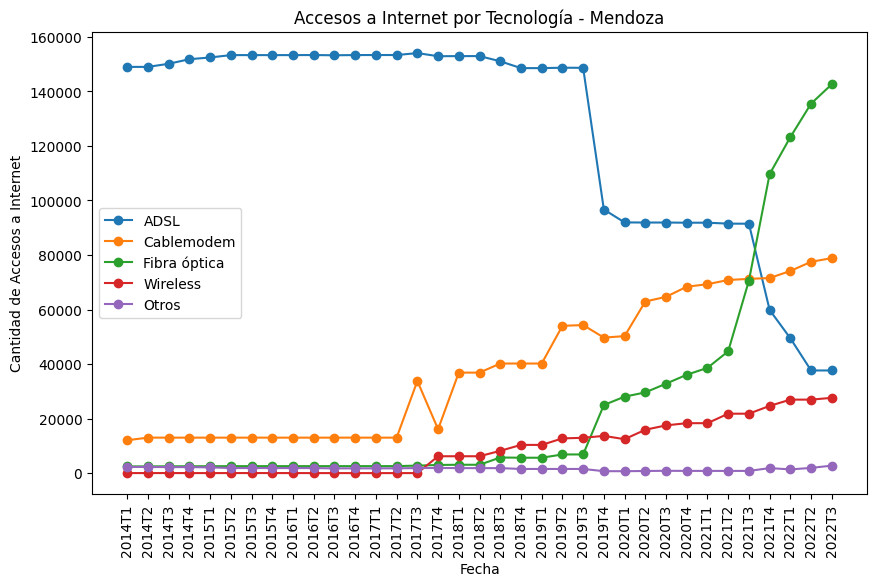

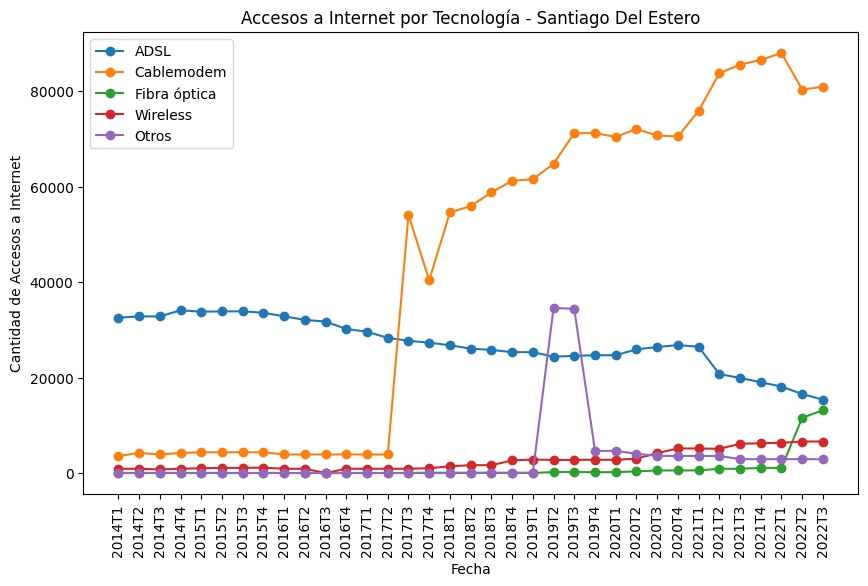

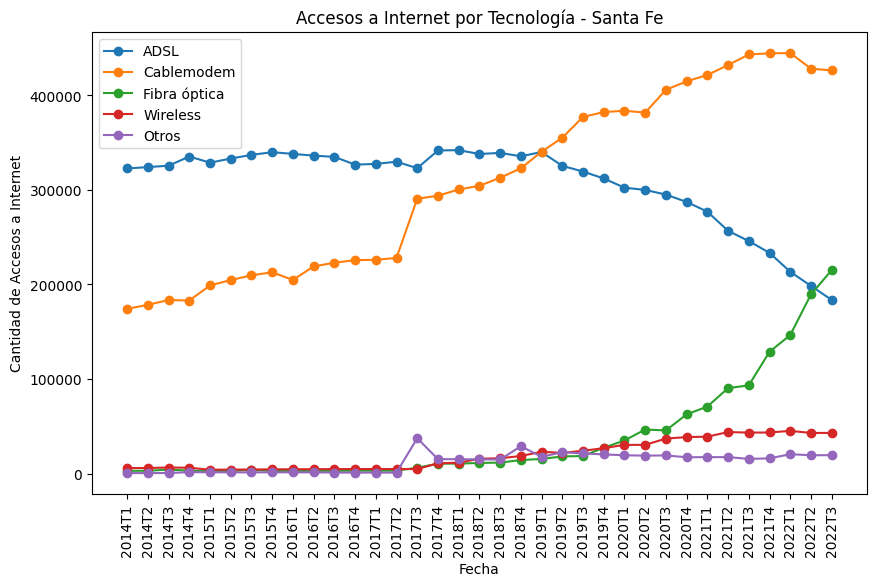

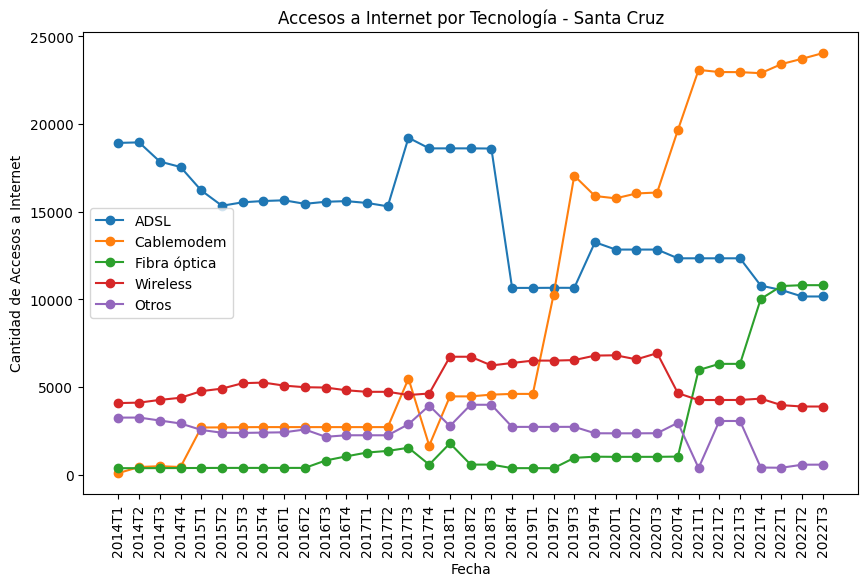

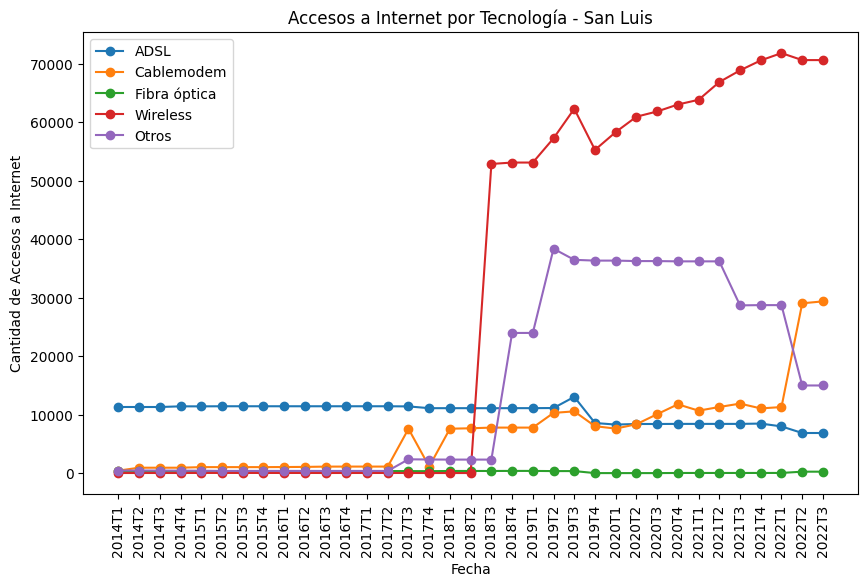

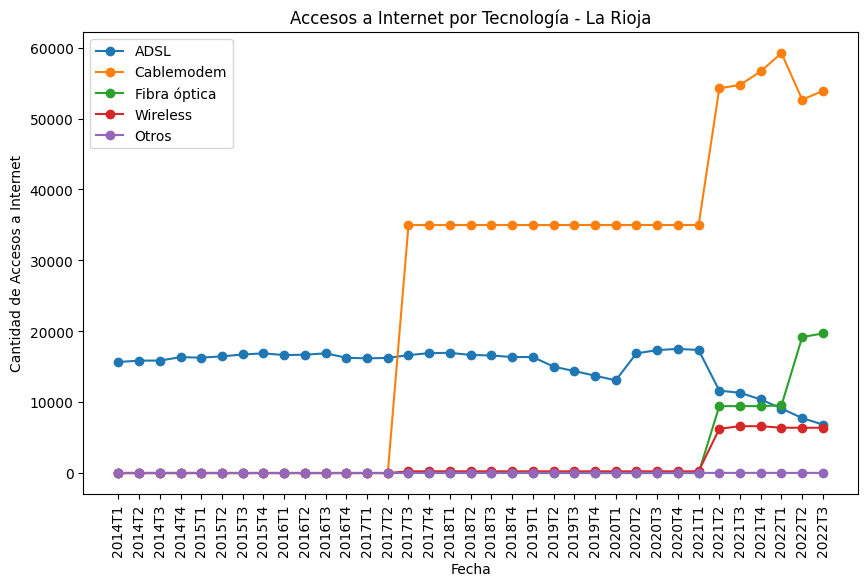

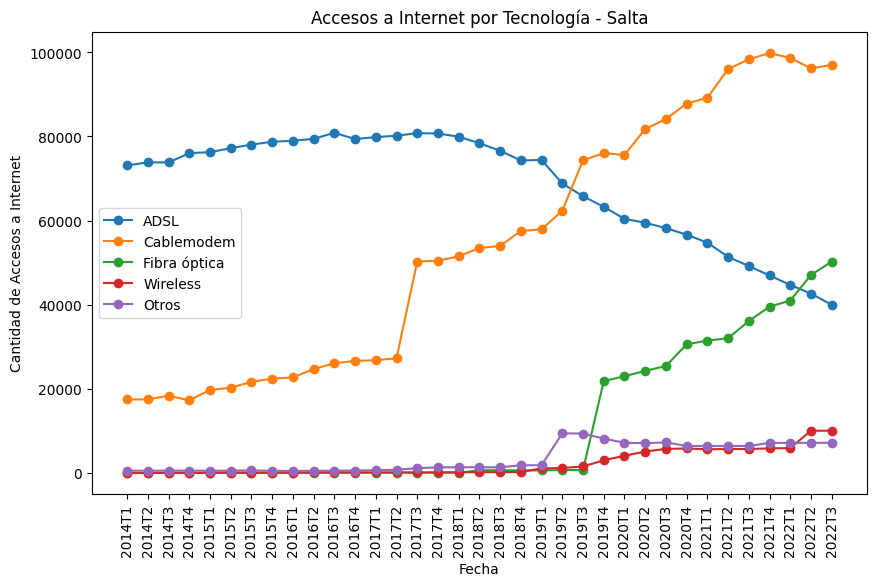

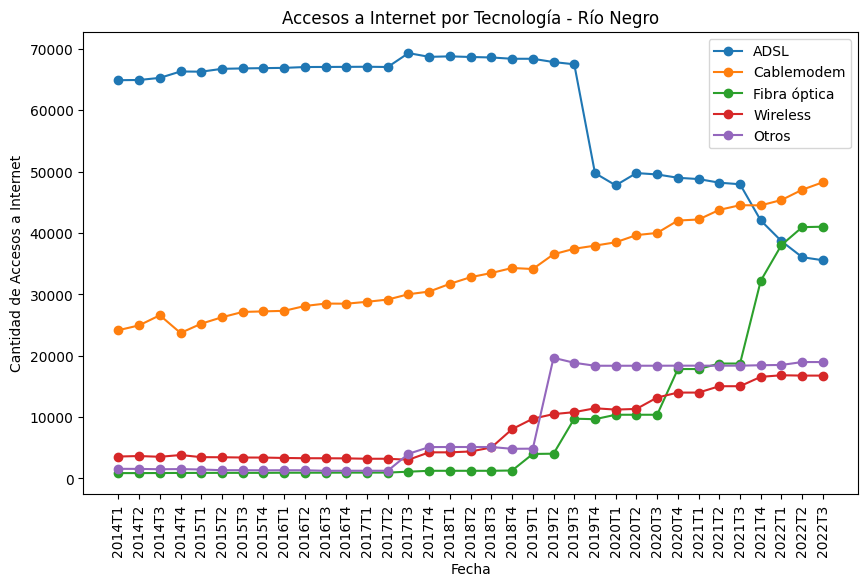

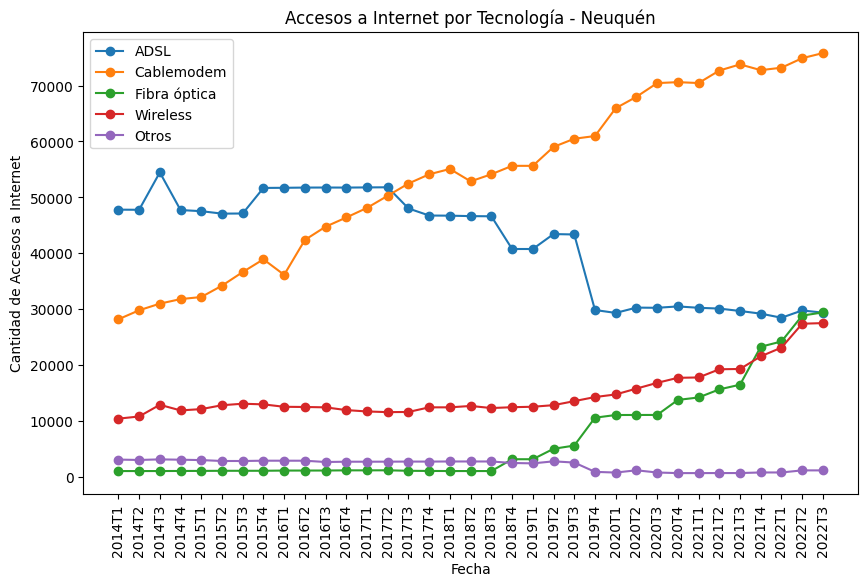

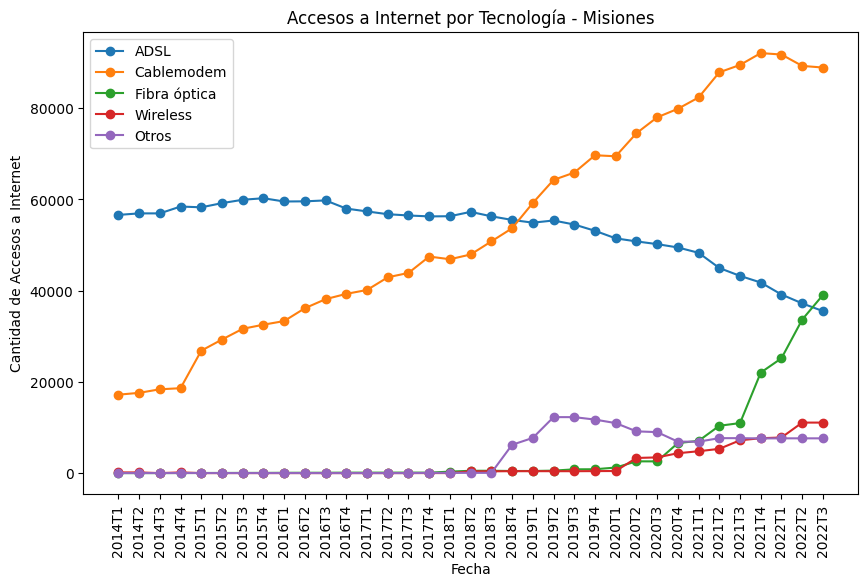

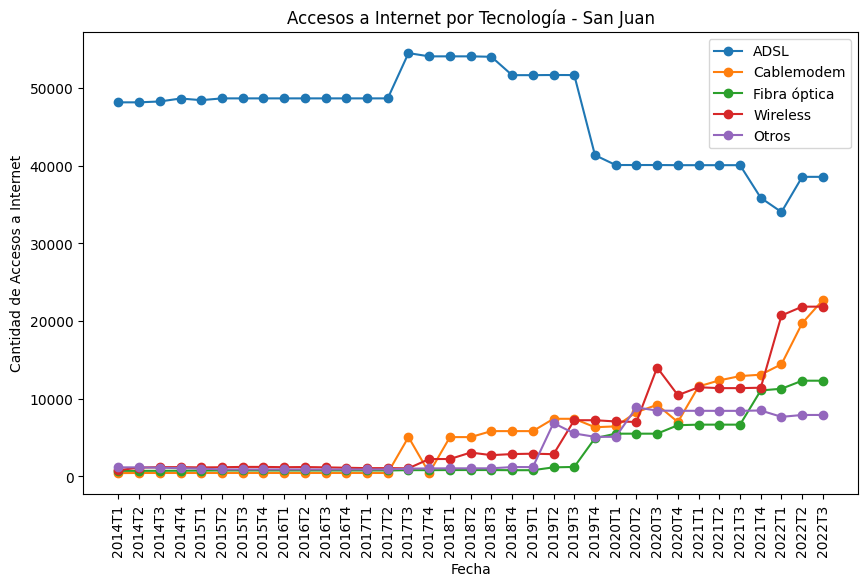

In [96]:

#import matplotlib.pyplot as plt

df4 = df4.sort_values("Fecha")

# Lista de tecnologías a graficar
tecnologias = ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']

# Bucle para generar un gráfico por provincia
for provincia in df4['Provincia'].unique():
    # Filtrar el DataFrame por provincia
    df_provincia = df4[df4['Provincia'] == provincia]
    
    # Crear una figura y un eje para el gráfico
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Iterar sobre las tecnologías y graficar una línea por cada una
    for tecnologia in tecnologias:
        ax.plot(df_provincia['Fecha'], df_provincia[tecnologia], marker='o', label=tecnologia)
    
    # Configurar los ejes y etiquetas
    ax.set_xlabel('Fecha')
    ax.set_ylabel('Cantidad de Accesos a Internet')
    ax.set_title(f'Accesos a Internet por Tecnología - {provincia}')
    
    # Rotar las etiquetas del eje x si es necesario
    plt.xticks(rotation=90)
    
    # Mostrar la leyenda
    ax.legend()
    
    # Mostrar el gráfico
    plt.show()



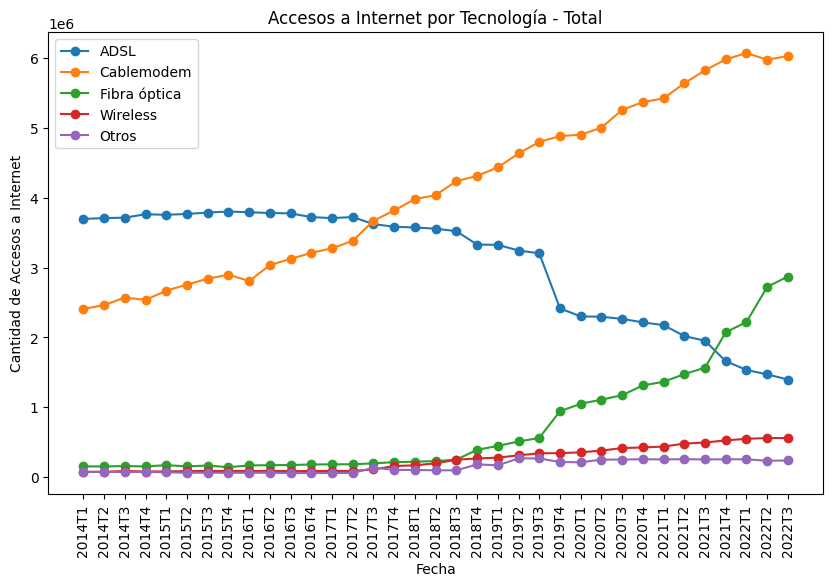

In [97]:
import matplotlib.pyplot as plt

# Calcular la suma de las tecnologías para cada fecha en todo el DataFrame
df_agregado = df4.groupby('Fecha')[tecnologias].sum()

# Crear el gráfico de línea
fig, ax = plt.subplots(figsize=(10, 6))
for tecnologia in tecnologias:
    ax.plot(df_agregado.index, df_agregado[tecnologia], marker='o', label=tecnologia)

# Configurar los ejes y etiquetas
ax.set_xlabel('Fecha')
ax.set_ylabel('Cantidad de Accesos a Internet')
ax.set_title('Accesos a Internet por Tecnología - Total')

# Rotar las etiquetas del eje x si es necesario
plt.xticks(rotation=90)

# Mostrar la leyenda
ax.legend()

# Mostrar el gráfico
plt.show()


In [103]:
#df_dashboard1 = pd.read_excel("Dataset/Dataset2/Dataset para dashboard.xlsx")

In [105]:
#df_dashboard2 = pd.read_excel("Dataset/Dataset2/Dataset para dashboard.xlsx")

In [107]:
#df_dashboard3 = pd.read_excel("Dataset/Dataset2/Dataset para dashboard.xlsx")

In [108]:
#df_dashboard1.to_csv("Dataset/Dataset2/accesos_totales.csv",index=False)
#df_dashboard2.to_csv("Dataset/Dataset2/accesos_tecnologia.csv",index=False)
#df_dashboard3.to_csv("Dataset/Dataset2/velocidad.csv",index=False)